In [1]:
import os
import pandas as pd
import numpy as np
data_folder = os.path.join(os.path.expanduser("~"), "Documents\Masters\Spring2019\Data Mining\Assignments", "Week5")
print(data_folder)
data_filename = os.path.join(data_folder, "ad.data")

C:\Users\sheth\Documents\Masters\Spring2019\Data Mining\Assignments\Week5


In [2]:
def convert_number(x):
    try:
        return float(x)
    except ValueError:
        return np.nan

In [3]:
converters = {}
for i in range(1558):
    converters[i] = convert_number

In [4]:
converters[1558] = lambda x: 1 if x.strip() == "ad." else 0

In [5]:
ads = pd.read_csv(data_filename, header=None, converters=converters)

In [6]:
ads.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125.0,125.0,1.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,57.0,468.0,8.2105,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,33.0,230.0,6.9696,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,60.0,468.0,7.8000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,60.0,468.0,7.8000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [7]:
ads.dropna(inplace=True)

In [8]:
X = ads.drop(1558, axis=1).values
y = ads[1558]

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
Xd = pca.fit_transform(X)

In [10]:
np.set_printoptions(precision=3, suppress=True)
pca.explained_variance_ratio_

array([0.854, 0.145, 0.001, 0.   , 0.   ])

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=14)
scores_reduced = cross_val_score(clf, Xd, y, scoring='accuracy' , cv=3)

In [12]:
scores_reduced

array([0.944, 0.933, 0.921])

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt

In [14]:
classes = set(y)
colors = ['red', 'green']

In [15]:
import seaborn as sns

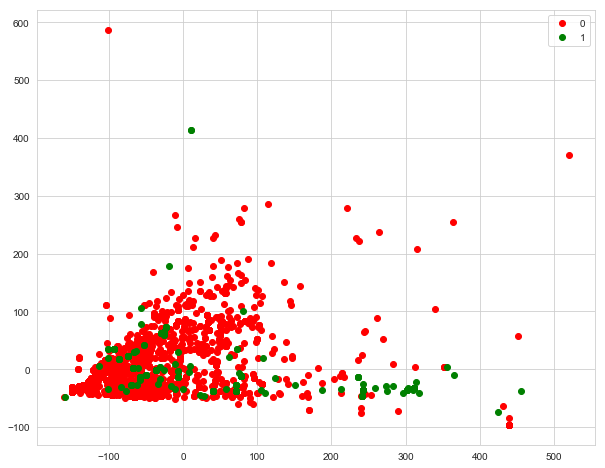

In [16]:
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
for cur_class, color in zip(classes, colors):
    mask = (y == cur_class).values
    plt.scatter(Xd[mask,0], Xd[mask,1], marker='o', color=color, label=int(cur_class))
plt.legend()
plt.show()

In [17]:
########## Custom Transformer

from sklearn.base import TransformerMixin
from sklearn.utils import as_float_array

In [18]:
class MeanDiscrete(TransformerMixin):
    def fit(self, X, y=None):
        X = as_float_array(X)
        self.mean = X.mean(axis=0)
        return self

    def transform(self, X, y=None):
        X = as_float_array(X)
        assert X.shape[1] == self.mean.shape[0]
        return X > self.mean

In [19]:
mean_discrete = MeanDiscrete()
X_mean = mean_discrete.fit_transform(X)

In [20]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('mean_discrete', MeanDiscrete()), ('classifier', DecisionTreeClassifier(random_state=14))])
scores_mean_discrete = cross_val_score(pipeline, X, y, scoring='accuracy' , cv =3)
print("Mean Discrete performance: {0:.3f}".format(scores_mean_discrete.mean()))

Mean Discrete performance: 0.917
